In [1]:
from classy import Class
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paramsGO = {
    'H0': 67.69 , 
    'T_cmb': 2.725,
    'omega_b': 0.02245,
    'omega_cdm': 0.1197,
    'n_s': 0.9718,
    'ln10^{10}A_s': 3.0335,
    'tau_reio': 0.0508,
    'Omega_Lambda': 0.,
    'Omega_k': 0.,
    'fluid_equation_of_state': 'GO',
    'alpha_GO': 0.88,
    'beta_GO': 0.44,
    'gauge': 'newtonian', 
    'use_ppf': 'yes',
    'const_cs2': 'yes',
    'cs2_fld' : 0.0,
    'P_k_max_1/Mpc':3.0,
    'k_output_values': '0.0001,0.01, 0.1',
    'evolver': 0, 
    'output': 'tCl,mPk'}

In [3]:
paramsLCDM = {
    'H0': 67.69 , 
    'T_cmb': 2.725,
    'omega_b': 0.02245,
    'omega_cdm': 0.1197,
    'n_s': 0.9718,
    'ln10^{10}A_s': 3.0335,
    'tau_reio': 0.0508,
    'Omega_fld': 0.,
    'Omega_k': 0.,
    'gauge': 'newtonian', 
    'P_k_max_1/Mpc':3.0,
    'k_output_values': '0.0001,0.01, 0.1',
    'output': 'tCl,mPk'}

In [4]:
cosmo = Class() ; lCDM = Class() ;

In [5]:
GO3 = Class(); GO4 = Class(); lCDMmodf = Class()

In [6]:
cosmo.set(paramsGO); lCDM.set(paramsLCDM)

True

In [7]:
paramsGO3= paramsGO.copy();   paramsGO3['cs2_fld'] = 1.0 ; GO3.set(paramsGO3)

True

In [8]:
paramsGO4= paramsGO.copy();   paramsGO4['cs2_fld'] = 0.2  ; GO4.set(paramsGO4)

True

In [9]:
paramsLCDMmodf= paramsLCDM.copy();   paramsLCDMmodf['omega_cdm'] = 0.1598; lCDMmodf.set(paramsLCDMmodf)

True

In [10]:
cosmo.compute()

In [11]:
GO3.compute()

In [12]:
GO4.compute()

In [13]:
lCDM.compute()

In [14]:
lCDMmodf.compute()

In [15]:
matplotlib.rcParams['xtick.direction'] = "in"
matplotlib.rcParams['ytick.direction'] = "in"

In [16]:
Cl_GO= cosmo.raw_cl();l=Cl_GO["ell"]; Cl=Cl_GO["tt"]; 

In [17]:
Cl_GO3= GO3.raw_cl();l3=Cl_GO3["ell"]; Cl3=Cl_GO3["tt"]; 

In [18]:
Cl_GO4= GO4.raw_cl();l4=Cl_GO4["ell"]; Cl4=Cl_GO4["tt"]; 

In [19]:
Cl_lcdm= lCDM.raw_cl(); ldm=Cl_lcdm["ell"]; Cldm=Cl_lcdm["tt"]; 

In [20]:
Cl_lcdmMdf= lCDMmodf.raw_cl(); ldmMdf=Cl_lcdmMdf["ell"]; CldmMdf=Cl_lcdmMdf["tt"]; 

In [21]:
Background_GO=cosmo.get_background();
Background_lCDM=lCDM.get_background(); 

In [22]:
z=Background_GO["z"];w=Background_GO["(.)w_fld"];
wlcdm=-Background_lCDM["(.)rho_lambda"]/Background_lCDM["(.)rho_lambda"]; 

/home/miguel/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


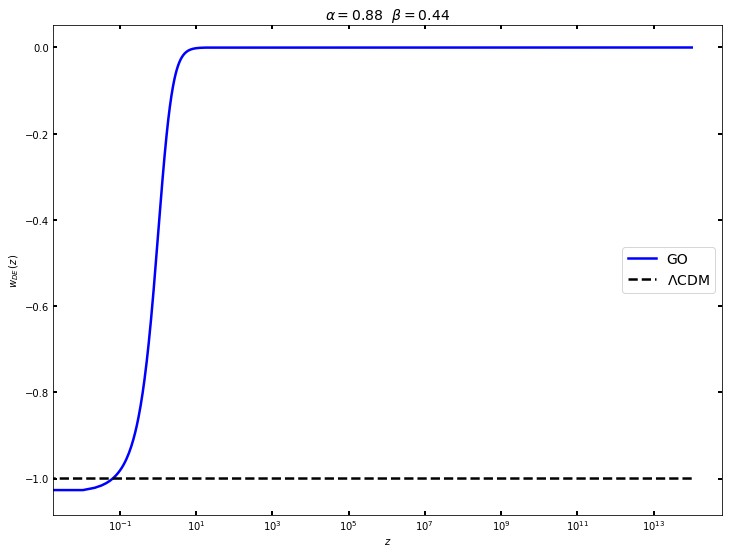

In [23]:
plt.figure(figsize=(12,9))
plot(z,w,'b-',linewidth=2.5)
plot(z,wlcdm,'k--',linewidth=2.5)
plt.xlabel(r'$z$')
plt.ylabel(r'$w_{DE}\,(z)$')
xscale('log')
plt.legend(labels=['GO', r'$\Lambda$CDM'],loc=7,prop={'size': 14})
plt.title(r'$\alpha = 0.88 \,\,\,\, \beta = 0.44 $',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')
#plt.savefig("w_GO.pdf", format="pdf", dpi=2000)

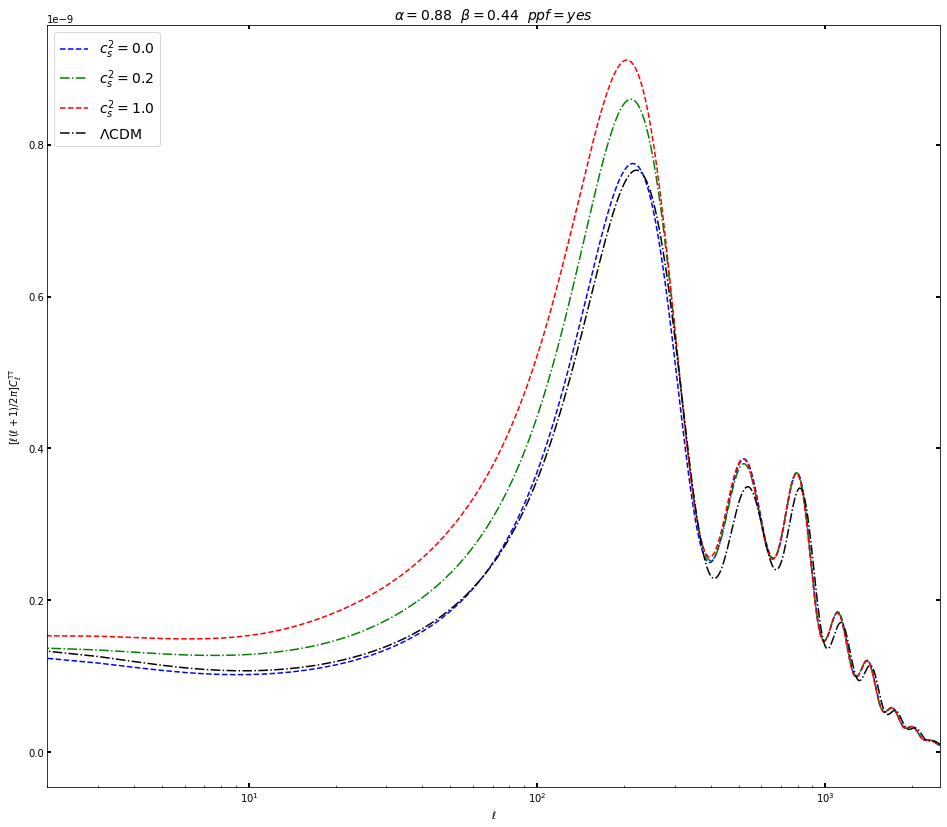

In [34]:
plt.figure(figsize=(16,14))
plt.figure(1)
plot(l,l*(l+1.)/2/pi*Cl,'b--')
plot(l4,l4*(l4+1.)/2/pi*Cl4,'g-.')
plot(l3,l3*(l3+1.)/2/pi*Cl3,'r--')

plot(ldm,ldm*(ldm+1.)/2/pi*Cldm,'k-.')
#plot(ldmMdf,ldmMdf*(ldmMdf+1.)/2/pi*CldmMdf,'y--')

plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
#yscale('log'); 
xscale('log');
plt.legend(labels=[r'$c_{s}^{2}=0.0$',r'$c_{s}^{2}=0.2$',
                   r'$c_{s}^{2}=1.0$',r'$\Lambda$CDM',r'$\Lambda$CDM effective'],loc=2,prop={'size': 14})
plt.title(r'$\alpha = 0.88 \,\,\,\, \beta = 0.44 \,\,\,\,ppf = yes$',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')
#plt.savefig("cl_GO_cs2.pdf", format="pdf", dpi=2000)

/home/miguel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/miguel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.
/home/miguel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


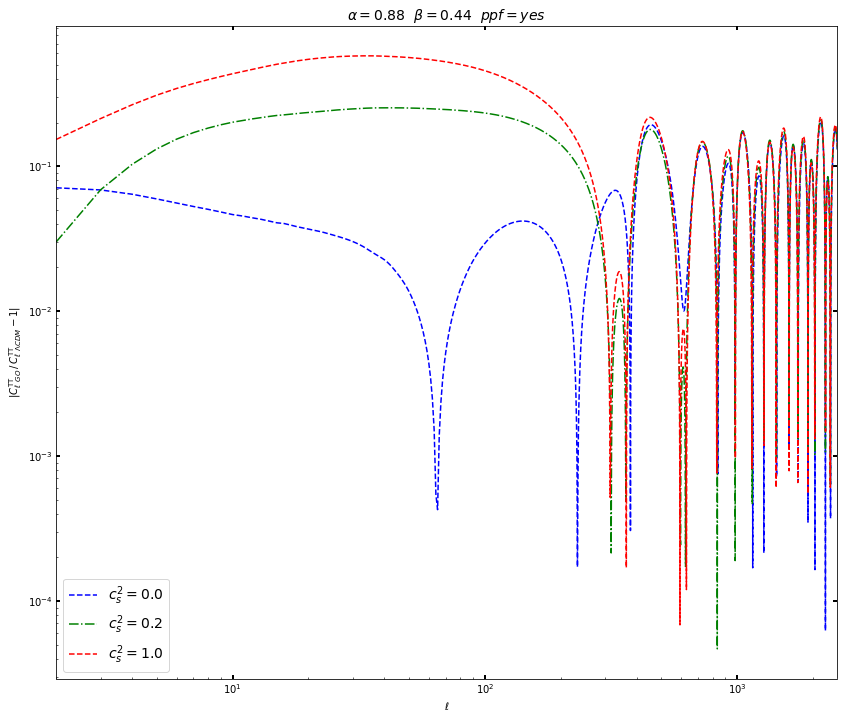

In [31]:
plt.figure(figsize=(14,12))
plt.figure(1)
plot(l,np.abs((Cl/Cldm)-1),'b--')
plot(l4,np.abs((Cl4/Cldm)-1),'g-.')
plot(l3,np.abs((Cl3/Cldm)-1),'r--')

plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ | C_{\ell \,\,\,GO}^\mathrm{TT}\, / \,C_{\ell\,\,\, \Lambda CDM}^\mathrm{TT} - 1 |$')
yscale('log'); 
xscale('log');
plt.legend(labels=[r'$c_{s}^{2}=0.0$',r'$c_{s}^{2}=0.2$',
                   r'$c_{s}^{2}=1.0$'],loc=3,prop={'size': 14})
plt.title(r'$\alpha = 0.88 \,\,\,\, \beta = 0.44 \,\,\,\,ppf = yes$',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')

In [26]:
kk = np.logspace(-6,np.log10(3),1000) # k in h/Mpc
Pk = []; Pk3 = []; Pk4 = []; 
Pklcdm = [];  # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pk3.append(GO3.pk(k*h,0.)*h**3)
    Pk4.append(GO4.pk(k*h,0.)*h**3)
    Pklcdm.append(lCDM.pk(k*h,0.)*h**3)

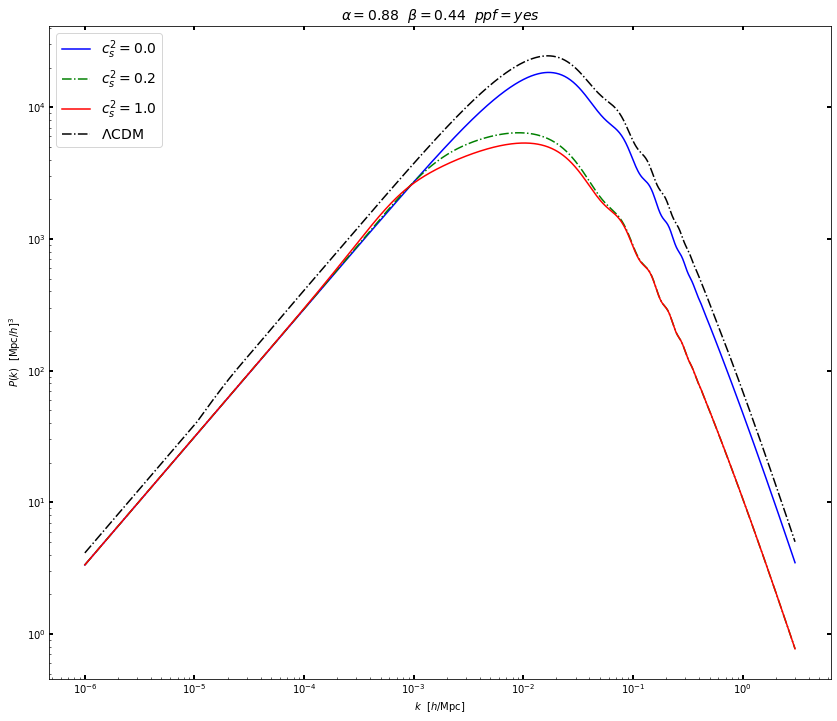

In [32]:
# plot P(k)
plt.figure(figsize=(14,12))
plt.xscale('log');plt.yscale('log'); #plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

plt.plot(kk,Pk,'b-')
plt.plot(kk,Pk4,'g-.')
plt.plot(kk,Pk3,'r-')

plt.plot(kk,Pklcdm,'k-.')
plt.legend(labels=[r'$c_{s}^{2}=0.0$',r'$c_{s}^{2}=0.2$',
                   r'$c_{s}^{2}=1.0$',r'$\Lambda$CDM'],loc=2,prop={'size': 14})
plt.title(r'$\alpha = 0.88 \,\,\,\, \beta = 0.44 \,\,\,\, ppf = yes$',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')
#plt.savefig("pk_GO_cs2.pdf", format="pdf", dpi=2000)

In [28]:
Pkc = []; Pk3c = []; Pk4c = []; 
for i in range(0,len(kk)):
    Pkc.append(np.abs((Pk[i]/Pklcdm[i]) -1)) # function .pk(k,z)
    Pk3c.append(np.abs((Pk3[i]/Pklcdm[i]) -1))
    Pk4c.append(np.abs((Pk4[i]/Pklcdm[i]) -1))

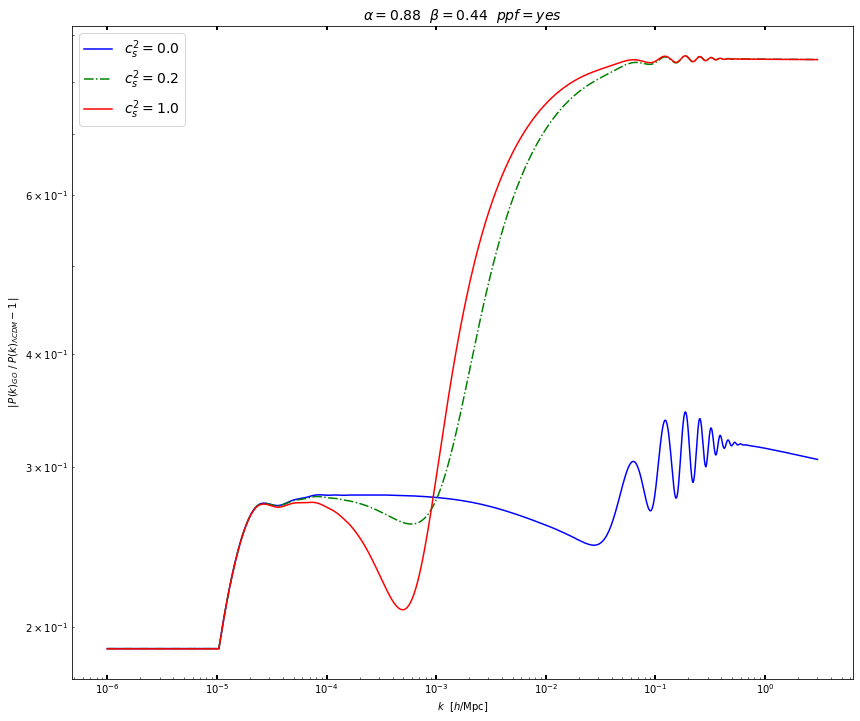

In [33]:
plt.figure(figsize=(14,12))
yscale('log'); 
xscale('log');
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$| \, P(k)_{GO} \,\, / \,\, P(k)_{\Lambda CDM} - 1 \,|$')

plt.plot(kk,Pkc,'b-')
plt.plot(kk,Pk4c,'g-.')
plt.plot(kk,Pk3c,'r-')

plt.legend(labels=[r'$c_{s}^{2}=0.0$',r'$c_{s}^{2}=0.2$',
                   r'$c_{s}^{2}=1.0$'],loc=2,prop={'size': 14})
plt.title(r'$\alpha = 0.88 \,\,\,\, \beta = 0.44 \,\,\,\, ppf = yes$',size=14)
plt.tick_params(direction='in', length=4, width=2, colors='k', right=True, top=True, 
                labelright='off',labeltop='off')
#plt.savefig("pk_GO_cs2.pdf", format="pdf", dpi=2000)